# Exercise 3: The development of classification models for mode choices

Transportation mode choice is a critical decision-making process that individuals, businesses, and urban planners face daily. It involves selecting the most suitable mode of transportation for a given journey/trip, taking into account factors such as cost, time, convenience, and environmental impact. In this tutorial, we will explore how to address the mode choice problem using classification models.

Key points to cover:

* Mode choice problem;
* Encoding techniques for categorical variables;
* Classification models training;
* Classification models evaluation;
* Hyperparameter Tuning to find the best model (assignment);

By the end of this tutorial, you will have a comprehensive understanding of how to leverage classification models to tackle the transportation mode choice problem. Whether you are a data scientist, transportation planner, or enthusiast, this tutorial will equip you with the knowledge and practical skills to make informed decisions in the realm of transportation planning and modeling.








# Understanding the mode choice problem by taking an overview of the data

In [ ]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
# Load the data use the pandas
data = pd.read_csv(url)
data

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,3076,345,50,360,30,20,50,80,55,wifi,155,45,5,food,rail
3076,3077,390,35,390,35,25,50,95,35,no-frills,120,75,15,wifi,air
3077,3078,300,30,390,15,5,80,95,45,food,155,45,25,no-frills,car
3078,3079,300,35,330,30,15,90,65,35,food,155,45,20,no-frills,rail


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            3080 non-null   int64 
 1   time_car      3080 non-null   int64 
 2   cost_car      3080 non-null   int64 
 3   time_bus      3080 non-null   int64 
 4   cost_bus      3080 non-null   int64 
 5   access_bus    3080 non-null   int64 
 6   time_air      3080 non-null   int64 
 7   cost_air      3080 non-null   int64 
 8   access_air    3080 non-null   int64 
 9   service_air   3080 non-null   object
 10  time_rail     3080 non-null   int64 
 11  cost_rail     3080 non-null   int64 
 12  access_rail   3080 non-null   int64 
 13  service_rail  3080 non-null   object
 14  choice        3080 non-null   object
dtypes: int64(12), object(3)
memory usage: 361.1+ KB


In [ ]:
data.describe()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,time_rail,cost_rail,access_rail
count,3080.00000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000
mean,1540.50000,312.725649,40.024351,370.724026,24.965909,15.094156,69.866883,80.029221,45.060065,142.878247,54.944805,14.840909
std,889.26374,50.390302,7.083073,37.369174,7.100207,7.099092,14.241063,21.254481,7.073683,17.727864,14.069500,7.089921
min,1.00000,250.000000,30.000000,300.000000,15.000000,5.000000,50.000000,50.000000,35.000000,120.000000,35.000000,5.000000
25%,770.75000,275.000000,35.000000,345.000000,20.000000,10.000000,60.000000,65.000000,40.000000,130.000000,45.000000,10.000000
50%,1540.50000,300.000000,40.000000,390.000000,25.000000,15.000000,70.000000,80.000000,45.000000,140.000000,55.000000,15.000000
75%,2310.25000,345.000000,45.000000,390.000000,30.000000,20.000000,80.000000,95.000000,50.000000,155.000000,65.000000,20.000000
max,3080.00000,390.000000,50.000000,420.000000,35.000000,25.000000,90.000000,110.000000,55.000000,170.000000,75.000000,25.000000


In [ ]:
# Perform a grouping operation on the 'data' DataFrame based on the 'choice' column
# and then calculate the size of each group
data.groupby('choice').size()

choice
air      705
bus      109
car      978
rail    1288
dtype: int64

Our dataset consists of various variables that encapsulate the factors influencing mode choice decisions. Let's take a closer look at the key variables:

* **ID (Unique individual ID)**: Ranging from 1 to 3080, this variable allows us to uniquely identify each individual in our study.

* **Travel Time and Cost for Different Modes**: For each mode of transportation (car, bus, air, and rail), we have data on travel time (in minutes) and travel cost (in pounds). These factors are pivotal in shaping the decision-making process, as individuals seek the most time-efficient and cost-effective options.

* **Access Time**: Access time (in minutes) represents the time it takes to reach the transportation mode, which is especially relevant for modes like bus and rail. Shorter access times may sway the choice in favor of these modes.

* **Service Quality**: For air and rail travel, we have a categorical variable indicating service quality. This offers insights into passenger preferences, as different individuals may prioritize features such as "no-frills," "wifi," or "food" services.

* **Choice (Selected Travel Mode)**: This is our target variable, representing the ultimate mode of transportation selected by individuals. It's a categorical variable with options including "car," "bus," "air," and "rail."

# Preprocess to encoding categorical variables




Data Encoding is an important pre-processing step in Machine Learning. It refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

We introduce three types of methods.

1. Label Encoding: Each unique category is assigned a Unique Integer value.

In [ ]:
## Label Encoding
# Import the pandas library as 'pd' for data manipulation and analysis
import pandas as pd

# Import the LabelEncoder class from scikit-learn for encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Create a list of lists containing data with two columns: 'Distance' and 'Education level'
data = [[10, 'high school'], [20, 'graduate degree'], [12, 'high school'], [16, 'graduate degree'], [22, 'undergraduate degree']]

# Create a DataFrame 'df' from the 'data' list with column names 'Distance' and 'Education level'
df = pd.DataFrame(data, columns=['Distance', 'Education level'])

# Initialize a LabelEncoder object as 'encoder' to encode the categorical variable
encoder = LabelEncoder()

# Use the LabelEncoder to transform the 'Education level' column from categorical to numerical values
df['Education level'] = encoder.fit_transform(df['Education level'])

# Display the DataFrame 'df' to show the results
df


,Distance,Education level
0,10,1
1,20,0
2,12,1
3,16,0
4,22,2


2. One-Hot Encoding: A Binary Column is created for each Unique Category in the variable. If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0.

In [ ]:
## One-Hot Encoding
# create a sample dataframe with a categorical variable
data = [[10, 'high school'], [20, 'graduate degree'], [12, 'high school'], [16, 'graduate degree'], [22, 'undergraduate degree']]
df = pd.DataFrame(data, columns=['Distance', 'Education level'])

# perform one-hot encoding on the 'Education level' column
df = pd.get_dummies(df, columns=['Education level'])
df

,Distance,Education level_graduate degree,Education level_high school,Education level_undergraduate degree
0,10,0,1,0
1,20,1,0,0
2,12,0,1,0
3,16,1,0,0
4,22,0,0,1


3. Dummy Encoding: The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

In [ ]:
## Dummy Encoding
# Create a sample dataframe with categorical variable
data = [[10, 'high school'], [20, 'graduate degree'], [12, 'high school'], [16, 'graduate degree'], [22, 'undergraduate degree']]
df = pd.DataFrame(data, columns=['Distance', 'Education level'])

# Use pandas 'get_dummies' function to perform dummy encoding on the 'Education level' column
# - 'drop_first=True' drops the first category to avoid multicollinearity (dummy variable trap)
# - 'prefix='Education level'' adds a prefix to the new dummy variable column names
dummy_df = pd.get_dummies(df['Education level'], drop_first=True, prefix='Education level')

#Concatenate the original DataFrame 'df' with the newly created dummy variables in 'dummy_df'
df = pd.concat([df, dummy_df], axis=1)

# Drop the original 'Education level' column as it's no longer needed
df=df.drop('Education level',axis=1)
df

,Distance,Education level_high school,Education level_undergraduate degree
0,10,1,0
1,20,0,0
2,12,1,0
3,16,0,0
4,22,0,1


There are also other encoding methods, such as count encoding, target encoding, sum encoding, etc. See package category_encoders if interested.

Let's move on to the main tasks. Note that each task can be run seperately.

# Practice task 3.1 - Develop the classification model (logistic regression) for travel mode choices

In this section, we'll be using logistic regression, a fundamental and interpretable machine learning algorithm.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

# Columns 'service_air' and 'service_rail' will be one-hot encoded
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

# Create feature variable 'x' by dropping the 'choice' and 'ID' columns from the DataFrame
# Create target variable 'y' by selecting the 'choice' column from the DataFrame
x = df.drop(['choice','ID',], axis=1)
y = df['choice']

# Split the dataset into training and testing sets, with 80% for training and 20% for testing
# - 'random_state' ensures reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# Create a LogisticRegression model with a maximum of 1000 iterations and a fixed random seed
model = LogisticRegression(max_iter=1000, random_state=0)

# Train the LogisticRegression model on the training data
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

The accuracy of the model is: 0.5633116883116883


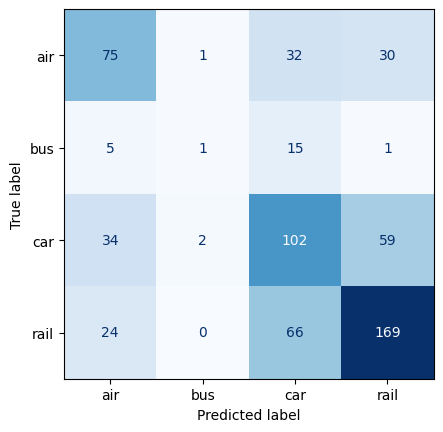

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score

# Create a confusion matrix display from the trained 'model' using the test data 'x_test' and true labels 'y_test'
# - 'cmap' sets the color map for the display to 'Blues'
# - 'colorbar=False' hides the color bar in the confusion matrix
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

We can calculate the accuracy manually also

In [10]:
(75+1+102+169)/(75+1+32+30+5+1+15+1+34+2+102+59+24+0+66+169)

0.5633116883116883

Pass a sample to the model and see what mode the model predicts it is.

In [11]:
# Select a single test case from the feature data 'x' using integer-based indexing (e.g., 100th row)
test_case = x.iloc[100]

# Use the trained 'model' to predict the class probabilities for the selected test case
predicted_probabilities = model.predict_proba(pd.DataFrame(test_case).T)

# Use the trained 'model' to predict the class label for the selected test case
predicted_label = model.predict(pd.DataFrame(test_case).T)

print(test_case)
print(predicted_probabilities)
print(predicted_label)

time_car                  275
cost_car                   45
time_bus                  360
cost_bus                   25
access_bus                 20
time_air                   90
cost_air                   65
access_air                 35
time_rail                 130
cost_rail                  55
access_rail                20
service_air_food            0
service_air_no-frills       0
service_air_wifi            1
service_rail_food           1
service_rail_no-frills      0
service_rail_wifi           0
Name: 100, dtype: int64
[[0.43457753 0.02009798 0.28837158 0.2569529 ]]
['air']


We decrease the travel time of car to see the changes of predicted probabilities and the predicted label.

In [12]:
modified_test_case=test_case.copy()
modified_test_case['time_car']=100
predicted_probabilities = model.predict_proba(pd.DataFrame(modified_test_case).T)
predicted_label = model.predict(pd.DataFrame(modified_test_case).T)

print(modified_test_case)
print(predicted_probabilities)
print(predicted_label)

time_car                  100
cost_car                   45
time_bus                  360
cost_bus                   25
access_bus                 20
time_air                   90
cost_air                   65
access_air                 35
time_rail                 130
cost_rail                  55
access_rail                20
service_air_food            0
service_air_no-frills       0
service_air_wifi            1
service_rail_food           1
service_rail_no-frills      0
service_rail_wifi           0
Name: 100, dtype: int64
[[0.23702048 0.006396   0.64798547 0.10859804]]
['car']


***Feel free to modify variables to observe how the probabilities and final labels change. Additionally, you can create real-world scenarios and input relevant data to observe how the model responds and provides predictions. This interactive experimentation will help you better understand the model's behavior and its outcomes in various situations.***

# Practice task 3.2 - Explore the performance of different categorization embedding methods

In this section, we delve into an essential aspect of machine learning and data preprocessing: handling categorical variables for classification tasks. The transportation mode choice dataset, which we've been working with, contains categorical features like 'service_air' and 'service_rail.' These features influence an individual's decision on their preferred mode of transportation.

To effectively utilize these categorical variables in our classification model, we explore three distinct categorization embedding methods as discussed before.

By exploring these categorization embedding methods and assessing their impact on model performance, you'll gain valuable insights into how to effectively preprocess categorical data for classification tasks. This knowledge will empower you to make informed choices when working with similar datasets and improve the overall accuracy and robustness of your machine learning models.


The accuracy of the model is: 0.5698051948051948


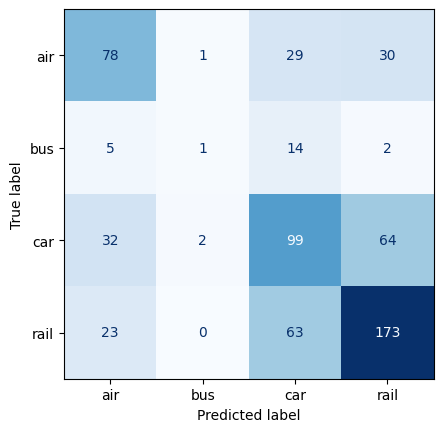

In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import os

#Use 'warnings.filterwarnings' to suppress redundant 'ConvergenceWarning' messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

#(1) One-Hot Encoding
# df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Practice task 3.3 - Explore the performance of different classification models

In this section, we explore the performance of various classification models for predicting transportation mode choices. Leveraging the transportation mode choice dataset, we aim to identify which model exhibits the highest accuracy and effectiveness in this classification task.

We consider a diverse range of classification algorithms, each with its unique characteristics:

(1) Logistic Regression: A widely used linear model known for its simplicity and interpretability.

(2) k-Nearest Neighbors (KNN): A non-parametric algorithm that classifies data points based on the majority class among their k-nearest neighbors.

(3) Random Forest: An ensemble learning method that combines multiple decision trees for improved accuracy and robustness.

(4) XGBoost: A gradient boosting algorithm known for its exceptional predictive performance and flexibility.

(5) Support Vector Machine (SVM): A powerful model that seeks to find a hyperplane that best separates different classes.

For each model, we train it using the training data and evaluate its performance using the testing data. We visualize the model's performance with a confusion matrix and report its accuracy.

By comparing the results across these diverse classification models, you'll gain insights into their strengths and weaknesses in predicting transportation mode choices. This knowledge will empower you to choose the most suitable model for similar classification tasks and improve your decision-making in transportation planning and modeling.

Let's proceed with the exploration and evaluation of these classification models to identify the best performer for mode choice prediction.

The accuracy of the model is: 0.3717532467532468


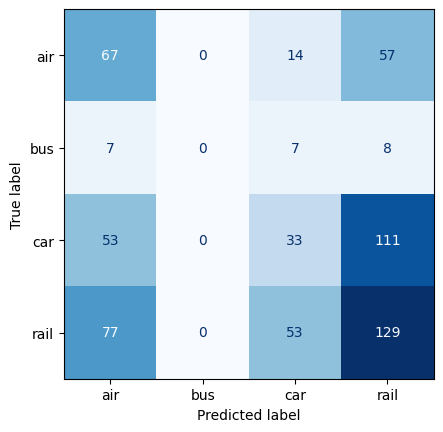

In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Different methods used
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(1)LR
# model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
# model=KNeighborsClassifier()

#(3)RF
# model = RandomForestClassifier(random_state=0)

#(4)XGBoost
## Use the 'map' method to replace categorical labels in 'y_train' with their corresponding numerical values
## Otherwise, It will report errors!
# map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
# y_train = y_train.map(map)
# y_test = y_test.map(map)
# model =  XGBClassifier()

#(5)SVM
# model= SVC(kernel="linear")

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Practice task 3.4 - Choose the best model based on different accuracy measures

In this section, we will determine the most suitable classification model for predicting transportation mode choices. Our goal is to make an informed decision based on various accuracy metrics that go beyond traditional accuracy measurement.

Here we only compare two models. The rest of them will be compared in your assignment.

Key Metrics Evaluated:

* Accuracy: Measures the overall correctness of predictions.
* Precision: Measures the accuracy of positive class predictions (e.g., precision for each mode choice).
* Recall: Measures the model's ability to correctly identify positive instances.

By evaluating these metrics, we aim to identify the model that excels in not only predicting the majority class but also in providing accurate predictions for each mode of transportation.

This approach empowers us to make a more informed choice when selecting the best classification model, taking into account the specific requirements and nuances of the mode choice prediction problem. Let's proceed with the exploration and evaluation of the Random Forest Classifier and Logistic Regression, followed by a comprehensive analysis of accuracy metrics.







Accuracy: 0.5633116883116883
Precision: [0.54347826 0.25       0.4744186  0.65250965]
Recall: [0.54347826 0.04545455 0.5177665  0.65250965]


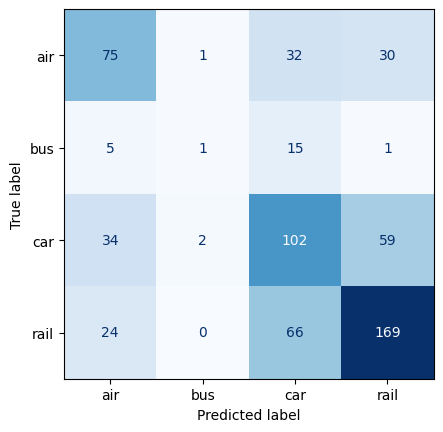

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import os

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
# model = RandomForestClassifier(random_state=0)

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate different measurements
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

# Assignment task - Find the best classification model for the travel mode choices prediction (assignment submission)

Welcome to this challenging homework assignment.
Your task is to analyze the provided dataset, which contains valuable information about individuals' choices of travel mode. The ultimate goal is to find the best classification model and the corresponding hyperparameters that accurately predicts these choices using the grid search.

**Good Luck!**

{'C': 0.1}
Accuracy: 0.564935064935065
Precision: [0.54861111 0.         0.4556962  0.68510638]
Recall: [0.57246377 0.         0.54822335 0.62162162]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


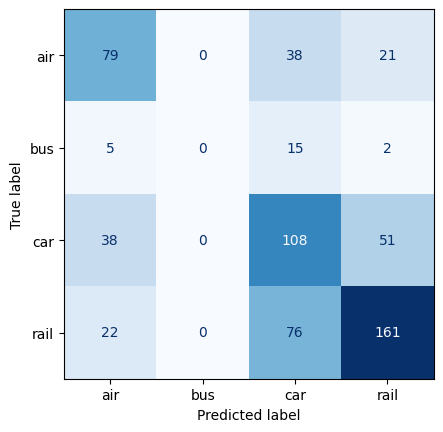

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

##---------------------The choice of encoding method---------------------------
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
# encoder = LabelEncoder()
# df=data.copy()
# df['service_air'] = encoder.fit_transform(df['service_air'])
# df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

##---------------------The choice of classification model---------------------------
#(1)LR
# params = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
# }
# model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
# params = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
# }
# model=KNeighborsClassifier()

#(3)RF
# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# model = RandomForestClassifier(random_state=0)

#(4)XGBoost
# params = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5]
# }
# map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
# y_train = y_train.map(map)
# y_test = y_test.map(map)
# model =  XGBClassifier()

#(5)SVM
## Note: It will costs a long time.
params = {
    'C': [0.1, 1, 10],
}


model= SVC(kernel="linear")

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')


As you conclude this tutorial on developing classification models for transportation mode choice, I'd like to recommend a fascinating research paper that delves deep into the realm of predicting travel behavior using machine learning and discrete choice models (DCMs). It provides a comprehensive and exhaustive comparison of classifiers for travel behavioral prediction, making it an indispensable resource for anyone interested in this field. Its findings and insights offer guidance on model selection and shed light on the complex trade-offs between prediction accuracy and computational cost.

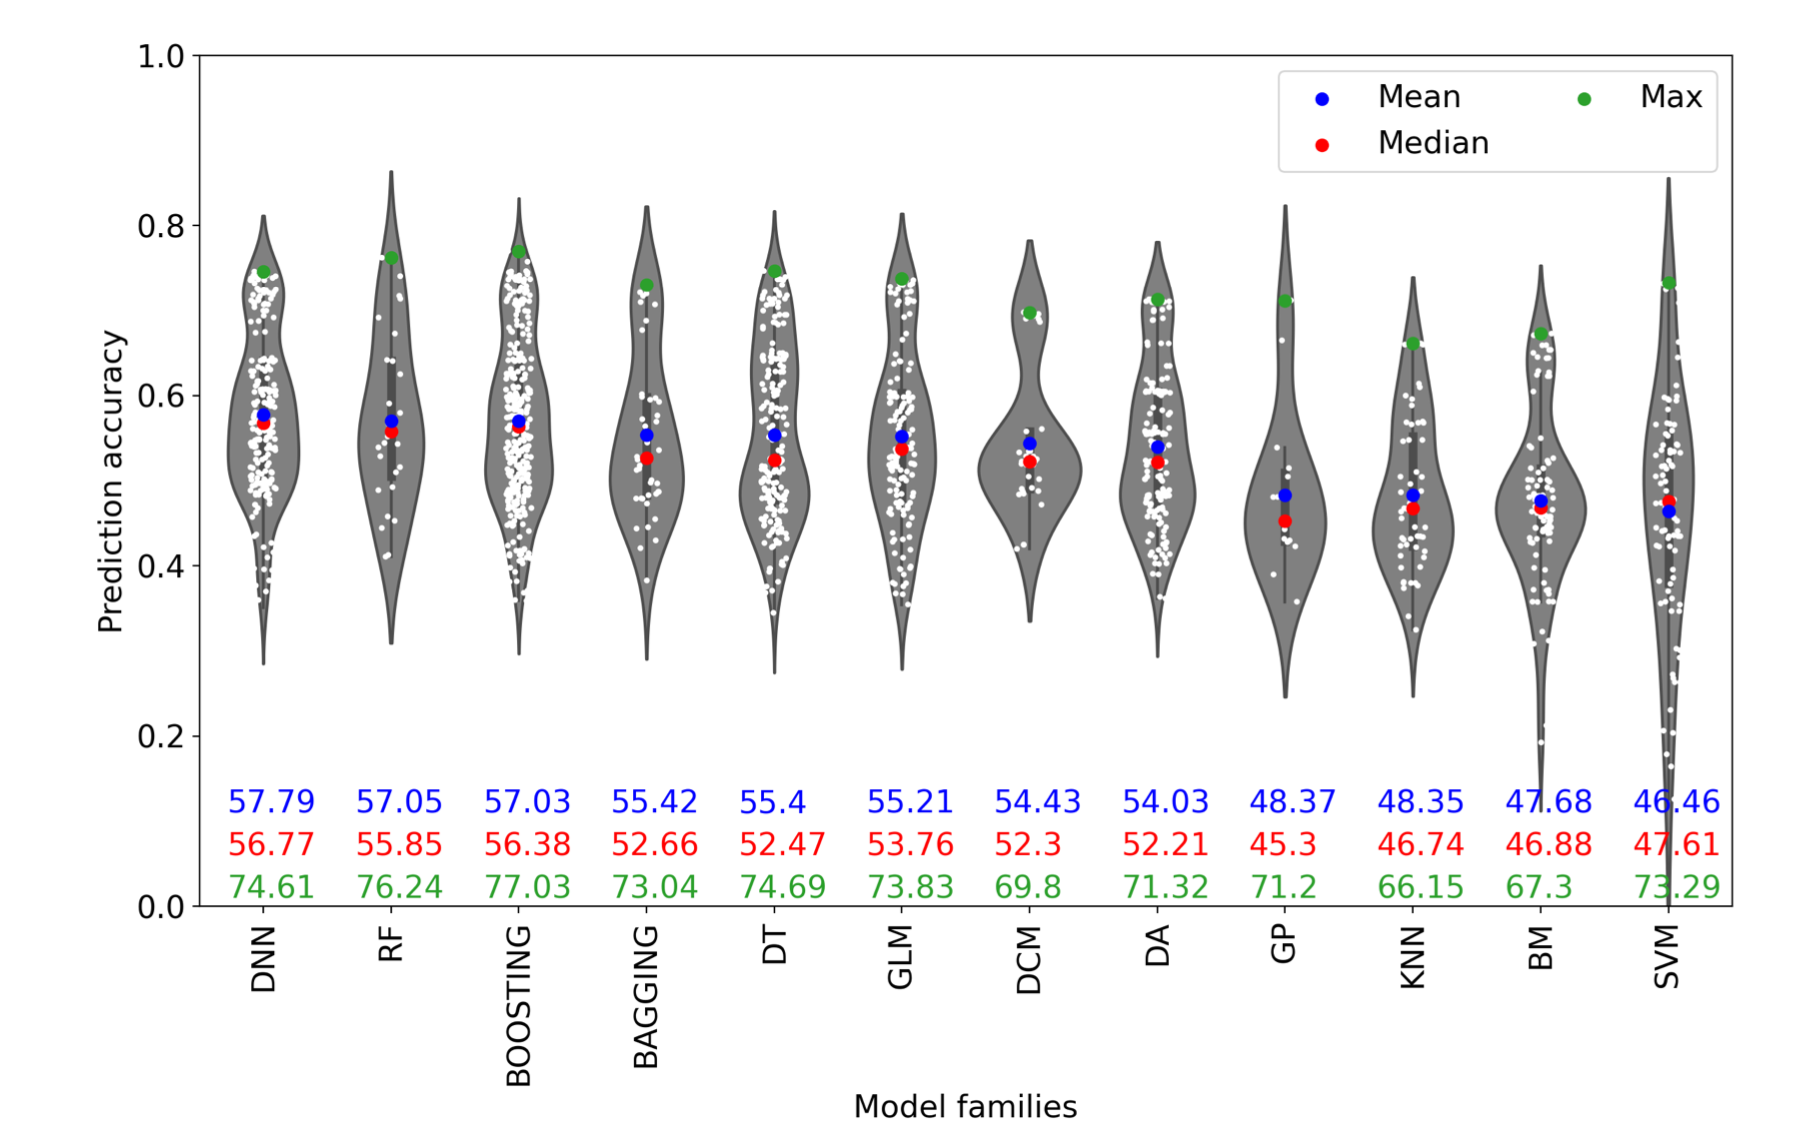
I recommend delving into this paper to gain deeper insights into the world of travel behavior prediction, machine learning, and discrete choice models. It's a valuable addition to your academic journey and research pursuits in transportation and data science.

Wang, S., Mo, B., Hess, S., & Zhao, J. (2021). Comparing hundreds of machine learning classifiers and discrete choice models in predicting travel behavior: an empirical benchmark. arXiv preprint arXiv:2102.01130.